# 《Python数据分析》第2次作业

## 说明：本次作业将使用好莱坞（2007-2011）的电影数据进行可视化。本次作业没有“标准答案”，请使用你认为最合理的方式进行可视化，并对结果进行描述和解读。可以使用matplotlib和（或）seaborn，或者其他你喜欢的Python可视化包。

##### 数据准备

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

In [ ]:
# Load data & drop last row
df11 = pd.read_csv("/content/Most Profitable Hollywood Stories - US 2011.csv")
df11.rename({"Film ": "Film"}, axis=1, inplace=True) # Remove trailing space
units = df11.tail(1)
df11.drop(df11.tail(1).index, inplace=True) # Drop tail, as contains units

print(df11.loc[df11["Domestic Gross"].isnull()].values) # Just 1 row
df11.drop(df11.loc[df11["Domestic Gross"].isnull()].index, inplace=True) # Drop the 1 row

# Drop commas
df11["Number of Theatres in US Opening Weekend"].replace(',','', regex=True, inplace=True)

# Change datatypes
df11["Domestic Gross"] = df11["Domestic Gross"].astype(float)

df11["Number of Theatres in US Opening Weekend"] = df11["Number of Theatres in US Opening Weekend"].astype(float)
df11["Number of Theatres in US Opening Weekend"].fillna(df11["Number of Theatres in US Opening Weekend"].mean(), inplace=True)

df11.info()

[['Never Back Down 2: The Beatdown' 'Sony' '?' '44' 'Rivalry' 'Action'
  nan nan nan nan nan '3' '0.00%' '8.60' nan nan
  'http://www.imdb.com/title/tt1754264/']]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 148
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Film                                                148 non-null    object 
 1   Lead Studio                                         147 non-null    object 
 2   Rotten Tomatoes %                                   148 non-null    object 
 3   Audience  score %                                   148 non-null    object 
 4   Story                                               136 non-null    object 
 5   Genre                                               147 non-null    object 
 6   Number of Theatres in US Opening Weekend            148 non-null    float64
 7 

In [ ]:
# Load data & drop last row
df07 = pd.read_csv("/content/Most Profitable Hollywood Stories - US 2007.csv")
df08 = pd.read_csv("/content/Most Profitable Hollywood Stories - US 2008.csv")
df09 = pd.read_csv("/content/Most Profitable Hollywood Stories - US 2009.csv")
df10 = pd.read_csv("/content/Most Profitable Hollywood Stories - US 2010.csv")

dfs_new = [df07, df08, df09, df10]
dfs = [df07, df08, df09, df10, df11]

# Drop heads, as contains units
for df in dfs_new:
  df.drop(df.head(1).index, inplace=True)

# Capitalize
stories = ["comedy", "quest"]
for df in dfs:
  df.Story = df.Story.str.capitalize()
  df.Story = df.Story.str.strip()

  df.rename({"Film ": "Film"}, axis=1, inplace=True)

  #for st in stories:
  #  df.loc[df["Story"] == st, "Story"] = st.capitalize()

# Clean Budget
df08.drop(["budget ", "Budget"], axis=1, inplace=True)
df08.rename({"Budget ": "Budget"}, axis=1, inplace=True)

# Datatypes
for df in dfs:
  df["Worldwide Gross"].replace(',','', regex=True, inplace=True)
  df["Worldwide Gross"] = df["Worldwide Gross"].astype(float)

  df["Budget"] = df["Budget"].astype(float)

### 第1题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），对Domestic Gross这个变量的分布进行可视化，并对可视化结果进行简单描述。（2分）

评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适（包括但并不限于布局、尺度、颜色、标记与线条等，下同）；（3）可视化结果描述是否合理和到位。

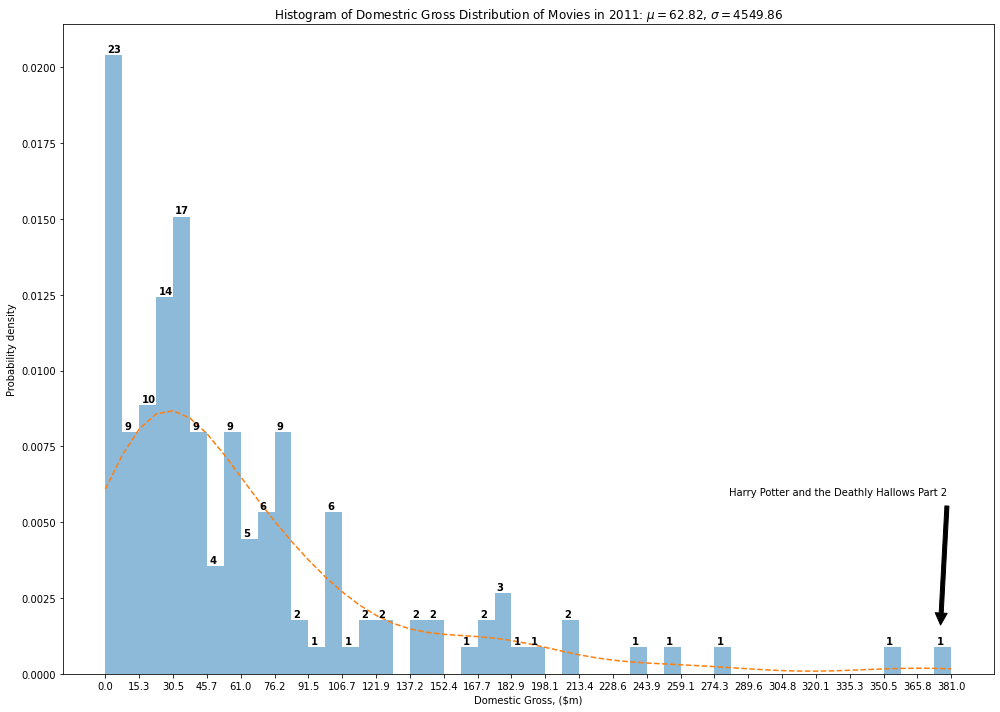

In [ ]:
num_bins = 50

# Estimate PDF (Probability Density Function)
density = kde.gaussian_kde(df11["Domestic Gross"].values)
x = np.linspace(df11["Domestic Gross"].min(),df11["Domestic Gross"].max(),num_bins+1)
y = density(x)

fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

# Set ticks on x-axis based on bins
plt.xticks(x[::2])

# the histogram of the data
y_array, x_array, patches = ax.hist(df11["Domestic Gross"], num_bins, density=True, alpha=0.5)

mu = round(df11["Domestic Gross"].mean(), 2)
var = round(df11["Domestic Gross"].var(), 2)

ax.plot(x_array, y, '--')
ax.set_xlabel('Domestic Gross, {}'.format(units["Domestic Gross"].values[0]))
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Domestric Gross Distribution of Movies in 2011: $\mu={}$, $\sigma={}$'.format(mu, var))

# Add numbers above bars
count, _ = np.histogram(df11["Domestic Gross"], num_bins)
for x,y,num in zip(x_array, y_array, count):
    if num != 0:
        plt.text(x+1, y+0.0001, num, fontsize=10, fontweight=800)

# Add highest grossing film annotation
film_max = df11.loc[df11["Domestic Gross"] == df11["Domestic Gross"].max()]["Film"].values[0]
plt.annotate(film_max, xy=(x_array[-1]-5, y_array[-1]+0.0005), 
             xytext=(x_array[-1]-100, y_array[-1]+0.005), arrowprops=dict(facecolor='black', shrink=0.05))


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## **描述：**


- 大部分的电影的Domestic Gross是：0.0-7.6m USD（最小的bin）
- 异常值比较多
- 2011年，Domestic Gross最大的电影是Harry Potter

### 第2题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），Number of Theatres in US Opening Weekend和Domestic Gross两个变量关系如何？请针对于它们之间的关系进行可视化，并对可视化结果进行简单描述。（2分）
温馨提示：可视化之前可能需要处理空缺值。处理空缺值的方式可自行定义并说明理由，言之成理即可。
评分要点：（1）处理缺失值的方式及理由；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

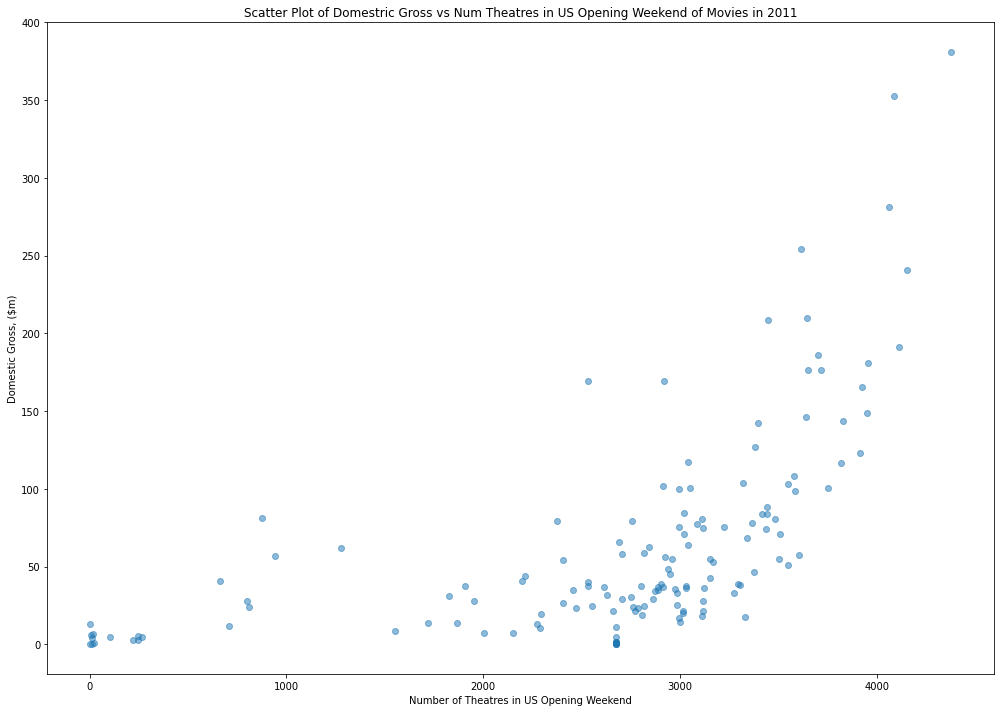

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

ax.scatter(df11["Number of Theatres in US Opening Weekend"], df11["Domestic Gross"], alpha=0.5)#, c=colors, alpha=0.5)

ax.set_ylabel('Domestic Gross, {}'.format(units["Domestic Gross"].values[0]))
ax.set_xlabel('Number of Theatres in US Opening Weekend')
ax.set_title(r'Scatter Plot of Domestric Gross vs Num Theatres in US Opening Weekend of Movies in 2011')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## **描述：**


- Domestic Gross和Num. Theatres是正相关的 （可能是因为越多Theatre放映一部电影，越多人会买那部电影的电影票，所以Domestic Gross也更大）
- 但是Number of Theatres和Domestic Gross没有1：1的相关，因为Domestic Gross第二大的电影没有Num. Theatres第二大的数 ; 也有电影在很多的theatres放映，但失败了 （Num theatres=2700的地方) --- 也许那些theatres分析得不好放映哪些电影
- 大概有三组: 
    - Num. Theatres 0-1000
    - Num. Theatres 1500-3500
    - Num. Theatres >4000

### 第3题：请使用2007-2011年的数据，探索Comedy（在Story这一列中）和另一种你喜欢的电影类型的Worldwide Gross随年份的变化趋势。请做可视化，并对可视化结果进行简单的描述。（2分）
评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适；（3）可视化结果描述是否合理和到位。

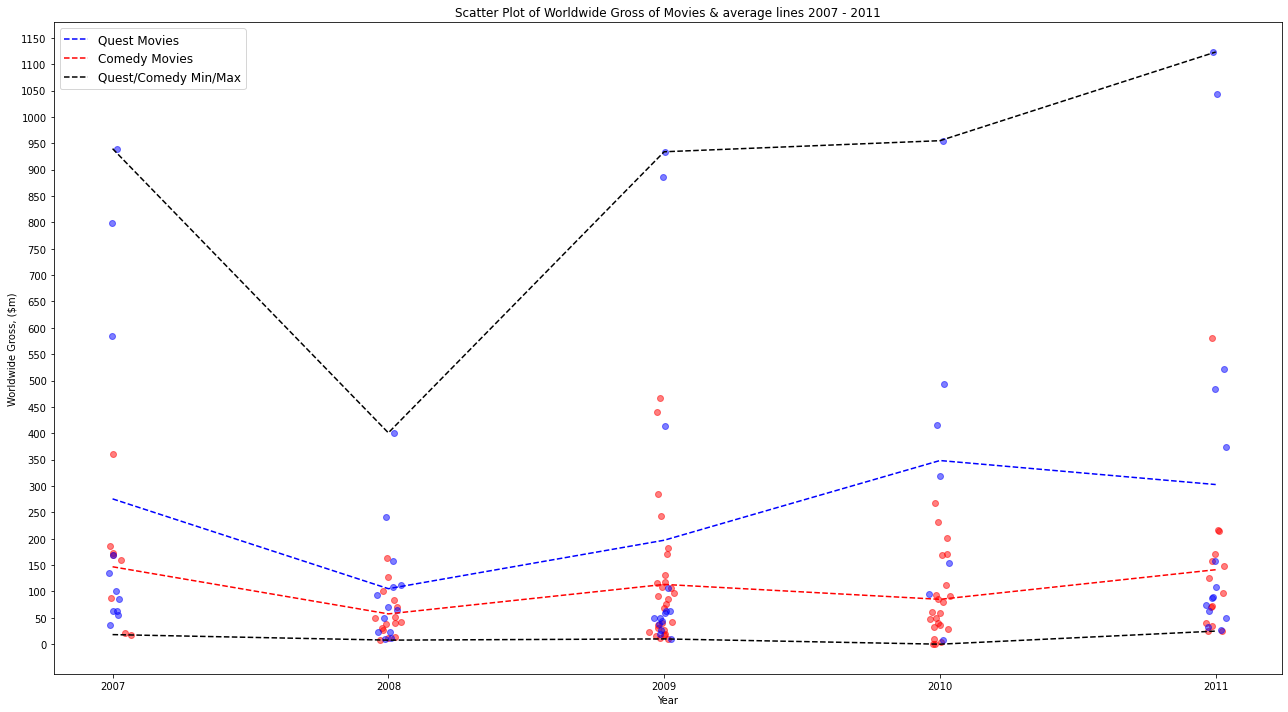

In [ ]:
# Parameters
categories = ["Comedy", "Quest"]
colors = ["r", "b"]
dfs = [df07, df08, df09, df10, df11]
years = [2007, 2008, 2009, 2010, 2011]

fig, ax = plt.subplots(figsize=(18,10), facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    for df, year in zip(dfs, years):
      gross_df = df.loc[df.Story==category, "Worldwide Gross"]

      # Random jitter to avoid overlaying
      jitter = np.random.normal(0, 0.02, size=len(gross_df))

      ax.scatter([year] * len(gross_df) + jitter, gross_df, c=colors[i], alpha=0.5)

# Add avg line
means_c, means_q, min_cq, max_cq = [], [], [], []
for df in dfs:
  means_q.append(df.loc[df.Story == "Quest", "Worldwide Gross"].mean())
  means_c.append(df.loc[df.Story == "Comedy", "Worldwide Gross"].mean())

  min_cq.append(df.loc[(df.Story == "Quest") | (df.Story == "Comedy"), "Worldwide Gross"].min())
  max_cq.append(df.loc[(df.Story == "Quest") | (df.Story == "Comedy"), "Worldwide Gross"].max())

ax.plot(years, means_q, '--', c='b', label="Quest Movies")
ax.plot(years, means_c, '--', c='r', label="Comedy Movies")

ax.plot(years, min_cq, '--', c='black', label="Quest/Comedy Min/Max")
ax.plot(years, max_cq, '--', c='black')

# Set ticks
plt.xticks(range(2007, 2012, 1))
plt.yticks(range(0, 1200, 50))


ax.set_ylabel('Worldwide Gross, {}'.format(units["Worldwide Gross"].values[0]))
ax.set_xlabel('Year')
ax.set_title(r'Scatter Plot of Worldwide Gross of Movies & average lines 2007 - 2011')
plt.legend(fontsize=12)    


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## **描述：**


- Worldwide Gross 最高的电影每年都是Quest类型的
- Quest的mean也每年比Comedy大一点 （蓝色和红色的线）
- Quest和Comedy的Worldwide Gross最高的电影有上升趋势 (Quest的max是那个黑色的线；Comedy是最高红色的点）
- 2008年Worldwide Gross下降了；也许是因为金融危机。

### 第4题：什么样的电影Profitablity（利润率，其值等于(Worldwide Gross-Budget)/Budget）更高？（4分）

温馨提示：（1）如果你认为不同年份的利润率不可以直接比，那你可能需要对利润率进行简单标准化，方法合理即可。（2）对于“什么样的电影利润率更高”的描述和回答，不一定要求全面，只需要按照你的喜好，选择几个点进行分析即可。

评分要点：（1）数据准备是否完备；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

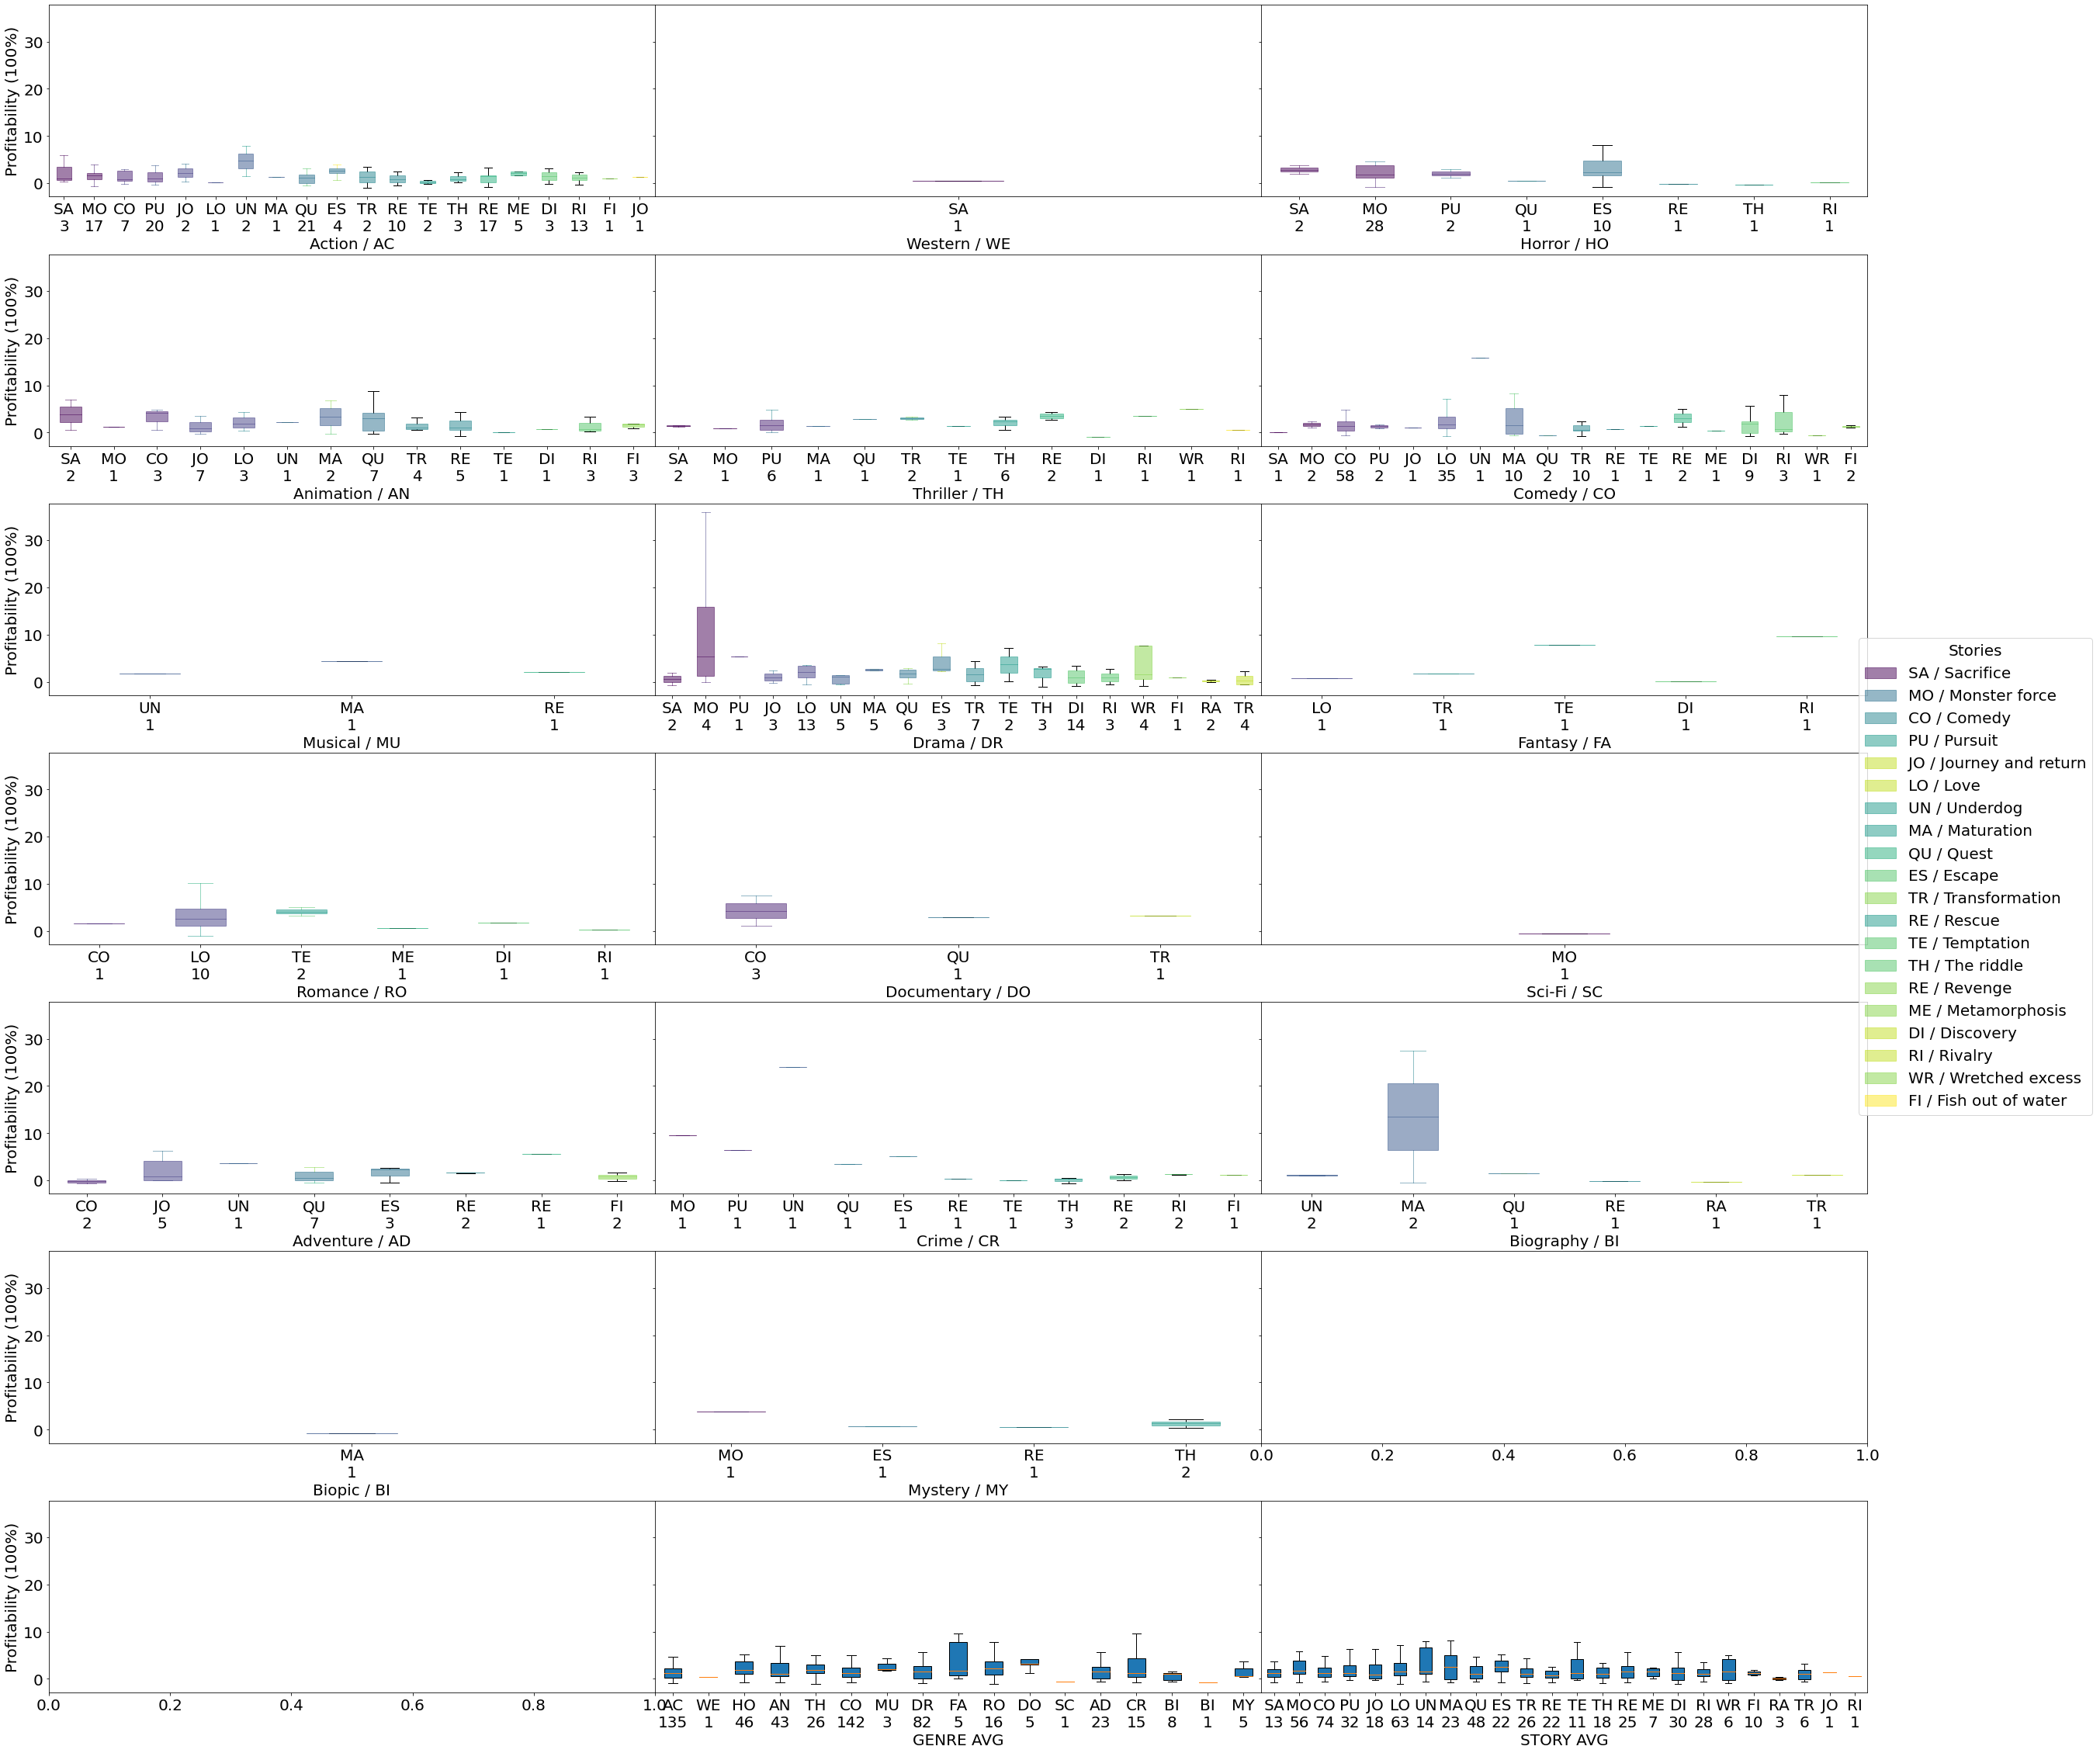

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Increase Font Size
plt.rcParams.update({'font.size': 20})

# Concat & clean dataset
full_df = pd.concat([df[["Film", "Story", "Genre", "Worldwide Gross", "Budget"]] for df in dfs])
full_df.drop(full_df.loc[full_df["Story"].isnull()].index, inplace=True)
full_df.drop(full_df.loc[full_df["Genre"].isnull()].index, inplace=True)
full_df.drop(full_df.loc[full_df["Worldwide Gross"].isnull()].index, inplace=True)
full_df.drop(full_df.loc[full_df["Budget"].isnull()].index, inplace=True)
full_df.drop(full_df.loc[full_df["Budget"] == 0].index, inplace=True)

# Pick unique Genres & Stories
genres = full_df["Genre"].unique()
stories = full_df["Story"].unique()

# Prep plots
fig, axes = plt.subplots(figsize=(42,40), facecolor='w', edgecolor='k', ncols=3, nrows=7, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0.3)

# Set unique colors
viridis = plt.cm.get_cmap('viridis', 12)
color_dict = {story: viridis(i/float(len(stories)-1)) for i, story in enumerate(stories)}

# Loop through genres & stories to create grouped boxplot
boxes_stories = {}

# Create each boxplot
for ax, genre in zip(axes.flatten(), genres):
    profits, ticks, colors = [], [], []
    for story in stories:
      sub_df = full_df.loc[(full_df.Story == story) & (full_df.Genre == genre)]
      if len(sub_df) == 0:
        continue
      # Calculating profitability instead of using the "Profitability" column, as it has NaNs & is always 100% more.
      profits.append((sub_df["Worldwide Gross"] - sub_df["Budget"])/sub_df["Budget"])
      ticks.append(story[:2].upper() + "\n" + str(len(sub_df)))
      colors.append(color_dict[story])

    # Plot - Do not show fliers due to Paranormal Activity
    bp = ax.boxplot(profits, patch_artist=True, showfliers=False)

    # Set equal colors for all stories
    for i, c in enumerate(colors):
      for k in ['boxes', 'whiskers', 'medians', 'caps']:
        plt.setp(bp[k][i], color=c, alpha=0.5)

    # Collect boxes & stories for legend
    for b, s in zip(bp["boxes"], stories):
      boxes_stories[s[:2].upper() + " / " + s] = b

    # Set ticks & margins
    ax.set(xticklabels=ticks, xlabel=genre + " / " + genre[:2].upper())
    ax.margins(0.05)


# Add AVG plots
# Genre AVG plot
ax = axes.flatten()[-2] 
profits, ticks = [], []
for genre in genres:
  sub_df = full_df.loc[full_df.Genre == genre]
  if len(sub_df) == 0:
      continue
  profits.append((sub_df["Worldwide Gross"] - sub_df["Budget"])/sub_df["Budget"])
  ticks.append(genre[:2].upper() + "\n" + str(len(sub_df)))

bp = ax.boxplot(profits, patch_artist=True, showfliers=False)
ax.set(xticklabels=ticks, xlabel="GENRE AVG")
ax.margins(0.05)

# Story AVG plot
ax = axes.flatten()[-1] 
profits, ticks = [], []
for story in stories:
  sub_df = full_df.loc[full_df.Story == story]
  if len(sub_df) == 0:
      continue
  profits.append((sub_df["Worldwide Gross"] - sub_df["Budget"])/sub_df["Budget"])
  ticks.append(story[:2].upper() + "\n" + str(len(sub_df)))

bp = ax.boxplot(profits, patch_artist=True, showfliers=False)
ax.set(xticklabels=ticks, xlabel="STORY AVG")
ax.margins(0.05)

# Create Global Legend
fig.legend(boxes_stories.values(),
           boxes_stories.keys(),
           loc='center right',
           title="Stories")

plt.setp(axes[:, 0], ylabel='Profitability (100%)')

plt.show()

In [ ]:
### EXAMPLE MOVIES ###

# For bold text
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Print out highest profit examples
for genre in genres:
  print("-"*50)
  print("Genre: ", genre)
  for story in stories:
    sub_df = full_df.loc[(full_df.Story == story) & (full_df.Genre == genre)]
    if len(sub_df) == 0:
      continue
    p = sub_df.loc[(sub_df["Worldwide Gross"] - sub_df["Budget"])/sub_df["Budget"] == (sub_df["Worldwide Gross"] - sub_df["Budget"])/sub_df["Budget"].max()]
    print("Story: ", story)
    print("Movie: ", color.BOLD + p["Film"].values[0] + color.END)

--------------------------------------------------
Genre:  Action
Story:  Sacrifice
Movie:  Watchmen 
Story:  Monster force
Movie:  Terminator Salvation 
Story:  Comedy
Movie:  G-Force 
Story:  Pursuit
Movie:  Indiana Jones and the Kingdom of the Crystal Skull
Story:  Journey and return
Movie:  Inception
Story:  Love
Movie:  Killers
Story:  Underdog
Movie:  Real Steel
Story:  Maturation
Movie:  Abduction
Story:  Quest
Movie:  Pirates of the Caribbean:
On Stranger Tides
Story:  Escape
Movie:  2012
Story:  Transformation
Movie:  Wanted
Story:  Rescue
Movie:  Pirates of the Caribbean: At World's End
Story:  Temptation
Movie:  Body of Lies
Story:  The riddle
Movie:  The International 
Story:  Revenge
Movie:  Quantum of Solace
Story:  Metamorphosis
Movie:  Spider-Man 3
Story:  Discovery
Movie:  Hancock
Story:  Rivalry
Movie:  Iron Man 2
Story:  Fish out of water
Movie:  The Chronicles of Narnia: Prince Caspian
Story:  Journey & return
Movie:  The Forbidden Kingdom
--------------------------

## **描述：**


- 利润mean最高的Genre+Story是Biography + Maturation，但是数不多（只有2个样本），所以置信很小；利润高和样本更多的是：Animation + Quest (比如Shrek)，Romance + Love (比如Twilight），Horror + Escape（比如The Final Destination）

- Genre是Documentary的电影的mean利润最高；Romance是第二 （看Genre AVG的图）

- Story是Maturation的电影的mean利润最高；Escape是第二 （看Story AVG的图）

- Genre和Story一样的电影的利润没有巨大的区别 - 比如Action + Quest类型的有21个样本，但是他们的利润都是100-300%； 如果只是Genre一样的电影有时候电影的利润的区别很大的 - 比如Fantasy只有5个样本但是利润是100-1000%。

- 数最多的Genre和Story都是Comedy

- 分析这个图之后，如果我执导一部电影，我会选择Love+Romance类型的。因为听起来比较容易，盈利潜力也很大😄
